### Merging a shapefile with a dataset (csv)

In this tutorial, we will see how to include the data contained in a csv to a shapefile. This is a join usually performed with a common column or name, which should be present in both datasets. In our case, we will use the counties' code of the State of São Paulo to include in the shapefile the yield of sugarcane and soybean of five years (2016-2020).  
I followed the instructions described [here](https://deepnote.com/@siew-sook-yan/Python-Merge-CSV-and-Shapefile-QPJtLgd5SPW7oVQ1Xryshg)

###### Note: 
This jupyter notebook was opened in a new environment created inside the conda prompt. I did this to easily install the geopandas package, following the instructions described [here](https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b).



In [ ]:
## Install the required libraries
!pip install libpysal

###### Note:
Sometimes, the installation by pip doesn't work. Therefore, you should install it in the anaconda environment.

In [112]:
## Load libraries
import numpy as np
import pandas as pd
import geopandas as gp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
import libpysal as ps
import folium

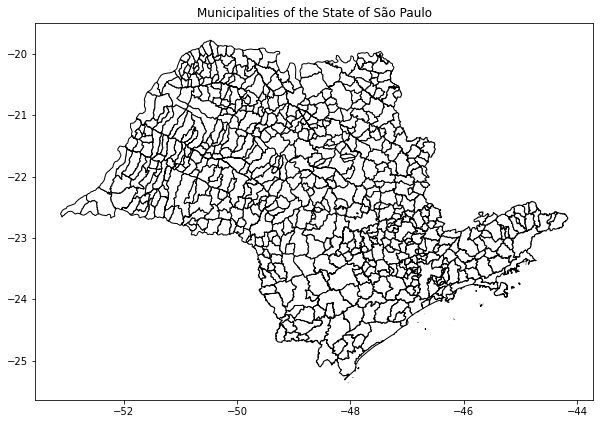

In [23]:
## Import shapefile and plot it
shape = gp.read_file('SP_municipios_2021/SP_Municipios_2021.shp')
fig, ax = plt.subplots(figsize = (10,10))
shape.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
plt.title('Municipalities of the State of São Paulo')
plt.show()

In [31]:
## Load dataset
dat = pd.read_csv('produtividade_SP.csv', sep =';')
dat.head(20)

,Nível,CD_MUN,Município,Cana-2016,Soja-2016,Cana-2017,Soja-2017,Cana-2018,Soja-2018,Cana-2019,Soja-2019,Cana-2020,Soja-2020
0,MU,3500105,Adamantina (SP),80000,1800,80000,2400,70000,2400,75000,1800,70000,1800
1,MU,3500204,Adolfo (SP),80000,4500,90000,3601,90000,3983,90000,3458,90000,3600
2,MU,3500303,Aguaí (SP),90000,3071,90000,3739,85000,3960,85000,3500,85000,3083
3,MU,3500402,Águas da Prata (SP),0,0,0,0,0,0,0,0,0,0
4,MU,3500501,Águas de Lindóia (SP),0,0,0,3609,0,0,0,0,0,0
5,MU,3500550,Águas de Santa Bárbara (SP),63000,4130,80000,4056,70000,4000,75000,3080,55000,4050
6,MU,3500600,Águas de São Pedro (SP),0,0,0,0,0,0,0,0,0,0
7,MU,3500709,Agudos (SP),61000,0,70000,3733,61000,3595,70000,2748,70000,3120
8,MU,3500758,Alambari (SP),80000,3000,80000,3000,80000,3000,80000,3000,80000,3000
9,MU,3500808,Alfredo Marcondes (SP),0,0,0,0,0,0,0,0,0,0


In [32]:
## A glimpse in the column names
print(shape.columns)
print(dat.columns)

Index(['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry'], dtype='object')
Index(['Nível', 'CD_MUN', 'Município', 'Cana-2016', 'Soja-2016', 'Cana-2017',
       'Soja-2017', 'Cana-2018', 'Soja-2018', 'Cana-2019', 'Soja-2019',
       'Cana-2020', 'Soja-2020'],
      dtype='object')


The common column from the csv and the shapefile that we will use is the "CD_NUM". This will be used to merge both datasets and include into the shapefile the information contained in the csv.

In [66]:
#Select columns from the shapefile
shape_columns = shape[['CD_MUN', 'geometry']]
shape_columns

csv_columns = dat[['CD_MUN', 'Município','Cana-2016', 'Soja-2016', 'Cana-2017',
       'Soja-2017', 'Cana-2018', 'Soja-2018', 'Cana-2019', 'Soja-2019',
       'Cana-2020', 'Soja-2020']]

In [67]:
## Change to int type
shape_columns['CD_MUN'] = shape_columns['CD_MUN'].astype(int) 

## Merge the new columns
new_shapefile = csv_columns.merge(shape_columns, on = 'CD_MUN', how = 'left')
new_shapefile

## Convert to geopandas dataframe
df = gp.GeoDataFrame(new_shapefile, geometry='geometry')
df

C:\Users\FREY\anaconda3\envs\gp_environ\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CD_MUN,Município,Cana-2016,Soja-2016,Cana-2017,Soja-2017,Cana-2018,Soja-2018,Cana-2019,Soja-2019,Cana-2020,Soja-2020,geometry
0,3500105,Adamantina (SP),80000,1800,80000,2400,70000,2400,75000,1800,70000,1800,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo (SP),80000,4500,90000,3601,90000,3983,90000,3458,90000,3600,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí (SP),90000,3071,90000,3739,85000,3960,85000,3500,85000,3083,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata (SP),0,0,0,0,0,0,0,0,0,0,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia (SP),0,0,0,3609,0,0,0,0,0,0,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,3557006,Votorantim (SP),0,0,0,0,0,0,0,4000,0,4000,"POLYGON ((-47.37440 -23.52042, -47.37444 -23.5..."
638,3557105,Votuporanga (SP),70000,3000,75000,2752,75000,2396,70000,2467,70000,3360,"POLYGON ((-50.02121 -20.33394, -50.02084 -20.3..."
639,3557154,Zacarias (SP),80000,3600,80000,3600,80000,3600,80000,2400,80000,3600,"POLYGON ((-49.99275 -21.03884, -49.99214 -21.0..."
640,3557204,Chavantes (SP),100000,3000,90000,3300,85000,3240,80000,3000,78960,3056,"POLYGON ((-49.68630 -22.93787, -49.68446 -22.9..."


In [69]:
## Save to a shapefile
df.to_file('shape_with_yield')

C:\Users\FREY\anaconda3\envs\gp_environ\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


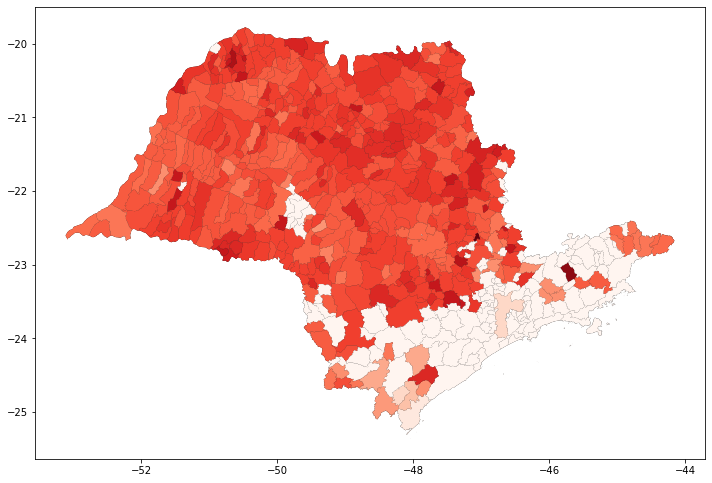

In [86]:
## Plotting
fig, ax = plt.subplots(figsize=(12,12))
df.plot(ax=ax, color = 'black')
df.plot(column='Cana-2020', ax=ax, cmap='Reds')  ## Lighter colors represents the area where the yield is low
plt.show()

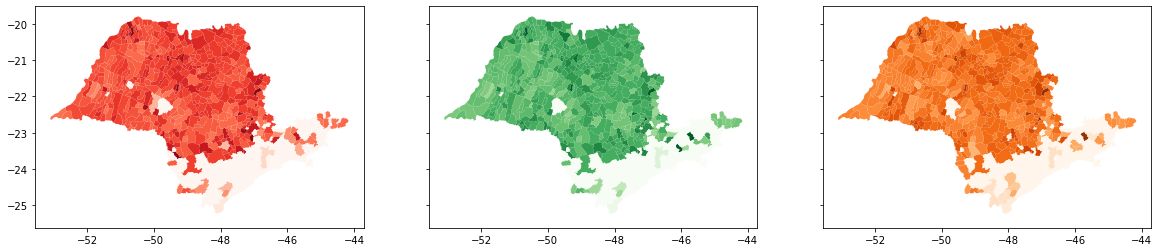

In [110]:
## Plot the first three columns
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,20), sharey = True)
df.plot(ax=ax, color = 'black')
df.plot(column='Cana-2016', ax=ax1, cmap='Reds')
df.plot(column='Cana-2017', ax=ax2, cmap='Greens')
df.plot(column='Cana-2018', ax=ax3, cmap='Oranges')
plt.show()

In [ ]:
## Interactive plotting
coords = [-23, -48]
my_map = folium.Map(location = coords, tiles='cartodbpositron', zoom_start = 7)
folium.Choropleth(df, data=df, key_on='feature.properties.Município', columns=['Município', 'Cana-2018'],\
                  fill_color='RdPu', line_weight=0.3, legend_name='Yield (kgha)').add_to(my_map)
my_map